In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r"data.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.info()
print("Data describe\n")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
Data describe



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data['age'].mean()

38.64358543876172

In [16]:
data['age'].median()

37.0

In [ ]:
data['age'].min()

17

In [ ]:
data['age'].max()

90

In [ ]:
data['age'].std()

13.710509934443557

In [17]:
data.income.nunique()

2

In [ ]:
data.groupby(['income','age']).count()

workclass  fnlwgt  education  educational-num  marital-status  \
age income                                                                  
17  <=50K         595     595        595              595             595   
18  <=50K         862     862        862              862             862   
19  <=50K        1050    1050       1050             1050            1050   
    >50K            3       3          3                3               3   
20  <=50K        1112    1112       1112             1112            1112   
...               ...     ...        ...              ...             ...   
88  <=50K           5       5          5                5               5   
    >50K            1       1          1                1               1   
89  <=50K           2       2          2                2               2   
90  <=50K          42      42         42               42              42   
    >50K           13      13         13               13              13   

            occupation  relationship  race  gender  capital-gain  \
age income                                                         
17  <=50K          595           595   595     595           595   
18  <=50K          862           862   862     862           862   
19  <=50K         1050          1050  1050    1050          1050   
    >50K             3             3     3       3             3   
20  <=50K         1112          1112  1112    1112          1112   
...                ...           ...   ...     ...           ...   
88  <=50K            5             5     5       5             5   
    >50K             1             1     1       1             1   
89  <=50K            2             2     2       2             2   
90  <=50K           42            42    42      42            42   
    >50K            13            13    13      13            13   

            capital-loss  hours-per-week  native-country  
age income                                                
17  <=50K            595             595             595  
18  <=50K            862             862             862  
19  <=50K           1050            1050            1050  
    >50K               3               3               3  
20  <=50K           1112            1112            1112  
...                  ...             ...             ...  
88  <=50K              5               5               5  
    >50K               1               1               1  
89  <=50K              2               2               2  
90  <=50K             42              42              42  
    >50K              13              13              13  

[142 rows x 13 columns]

In [20]:
data.groupby(['income','age']).min()

workclass  fnlwgt     education  educational-num  \
income age                                                            
<=50K  17                  ?   19752          10th                3   
       18                  ?   20057          10th                3   
       19                  ?   20469          10th                1   
       20                  ?   19410          10th                1   
       21                  ?   20728          10th                1   
...                      ...     ...           ...              ...   
>50K   83       Self-emp-inc  153183          10th                6   
       84       Self-emp-inc  172907  Some-college               10   
       85       Self-emp-inc  155981     Bachelors               13   
       88   Self-emp-not-inc  263569          11th                7   
       90                  ?   46786    Assoc-acdm                9   

                marital-status       occupation   relationship  \
income age                                                       
<=50K  17   Married-civ-spouse                ?        Husband   
       18             Divorced                ?        Husband   
       19             Divorced                ?        Husband   
       20             Divorced                ?        Husband   
       21             Divorced                ?        Husband   
...                        ...              ...            ...   
>50K   83   Married-civ-spouse  Exec-managerial        Husband   
       84   Married-civ-spouse            Sales        Husband   
       85              Widowed  Exec-managerial  Not-in-family   
       88   Married-civ-spouse  Farming-fishing        Husband   
       90   Married-civ-spouse                ?        Husband   

                          race  gender  capital-gain  capital-loss  \
income age                                                           
<=50K  17   Amer-Indian-Eskimo  Female             0             0   
       18   Amer-Indian-Eskimo  Female             0             0   
       19   Amer-Indian-Eskimo  Female             0             0   
       20   Amer-Indian-Eskimo  Female             0             0   
       21   Amer-Indian-Eskimo  Female             0             0   
...                        ...     ...           ...           ...   
>50K   83                White    Male             0             0   
       84                White    Male             0             0   
       85                White    Male             0             0   
       88                White    Male          6418             0   
       90                Black  Female             0             0   

            hours-per-week native-country  
income age                                 
<=50K  17                4              ?  
       18                2              ?  
       19                2              ?  
       20                2              ?  
       21                1              ?  
...                    ...            ...  
>50K   83               50  United-States  
       84               35  United-States  
       85               40  United-States  
       88               40  United-States  
       90               15        Ecuador  

[142 rows x 13 columns]

In [21]:
data.groupby(['income','age']).max()

workclass   fnlwgt     education  educational-num  \
income age                                                             
<=50K  17          State-gov   806316  Some-college               10   
       18          State-gov   761006  Some-college               14   
       19        Without-pay  1047822  Some-college               13   
       20          State-gov   745817  Some-college               14   
       21        Without-pay   811615  Some-college               14   
...                      ...      ...           ...              ...   
>50K   83       Self-emp-inc   240150     Bachelors               13   
       84       Self-emp-inc   172907  Some-college               10   
       85       Self-emp-inc   155981     Bachelors               13   
       88   Self-emp-not-inc   263569          11th                7   
       90   Self-emp-not-inc   313986   Prof-school               15   

                marital-status        occupation   relationship   race gender  \
income age                                                                      
<=50K  17              Widowed  Transport-moving      Unmarried  White   Male   
       18              Widowed  Transport-moving           Wife  White   Male   
       19            Separated  Transport-moving           Wife  White   Male   
       20            Separated  Transport-moving           Wife  White   Male   
       21              Widowed  Transport-moving           Wife  White   Male   
...                        ...               ...            ...    ...    ...   
>50K   83   Married-civ-spouse   Farming-fishing        Husband  White   Male   
       84   Married-civ-spouse             Sales        Husband  White   Male   
       85              Widowed   Exec-managerial  Not-in-family  White   Male   
       88   Married-civ-spouse   Farming-fishing        Husband  White   Male   
       90        Never-married             Sales           Wife  White   Male   

            capital-gain  capital-loss  hours-per-week native-country  
income age                                                             
<=50K  17          34095          1721              50  United-States  
       18          34095          1721              72  United-States  
       19          34095          2129              99     Yugoslavia  
       20          34095          2258              84     Yugoslavia  
       21           4865          2603              98        Vietnam  
...                  ...           ...             ...            ...  
>50K   83          20051          2392              55  United-States  
       84              0             0              35  United-States  
       85              0             0              40  United-States  
       88           6418             0              40  United-States  
       90          20051          1825              72  United-States  

[142 rows x 13 columns]

In [22]:
# Group by 'income' and get summary statistics of 'age' per income group
data.groupby('income')['age'].mean()

income
<=50K    36.872184
>50K     44.275178
Name: age, dtype: float64

In [23]:
data.groupby('income')['age'].median()

income
<=50K    34.0
>50K     43.0
Name: age, dtype: float64

In [25]:
data.groupby('income')['age'].min()

income
<=50K    17
>50K     19
Name: age, dtype: int64

In [26]:
data.groupby('income')['age'].max()

income
<=50K    90
>50K     90
Name: age, dtype: int64

In [27]:
data.groupby('income')['age'].std()

income
<=50K    14.104118
>50K     10.558983
Name: age, dtype: float64

In [28]:
grouped_values = [group['age'].tolist() for name, group in data.groupby('income')]
print(grouped_values)

[[25, 38, 18, 34, 29, 24, 55, 36, 26, 58, 20, 43, 37, 34, 72, 25, 25, 22, 23, 54, 32, 56, 24, 23, 26, 65, 22, 17, 20, 36, 29, 20, 39, 54, 52, 56, 18, 39, 21, 38, 21, 63, 33, 30, 39, 26, 33, 47, 41, 19, 46, 43, 46, 30, 21, 46, 17, 41, 69, 50, 20, 45, 23, 24, 31, 43, 20, 24, 59, 49, 59, 34, 20, 25, 49, 20, 51, 33, 22, 58, 52, 36, 41, 28, 19, 18, 18, 28, 20, 40, 26, 46, 23, 44, 31, 18, 19, 41, 41, 69, 28, 41, 24, 20, 57, 30, 49, 33, 23, 46, 18, 34, 47, 44, 19, 28, 27, 50, 22, 25, 26, 22, 42, 38, 55, 32, 22, 29, 42, 18, 58, 34, 26, 61, 48, 24, 40, 34, 37, 44, 64, 54, 23, 34, 22, 47, 79, 26, 31, 44, 19, 28, 57, 45, 34, 45, 73, 19, 25, 38, 39, 23, 49, 33, 21, 31, 23, 34, 25, 39, 41, 53, 25, 77, 18, 38, 55, 80, 34, 52, 42, 26, 31, 25, 55, 19, 62, 22, 39, 35, 28, 44, 21, 35, 42, 28, 21, 62, 39, 30, 72, 50, 28, 29, 26, 27, 61, 29, 21, 31, 25, 46, 19, 42, 18, 20, 23, 31, 33, 41, 22, 61, 30, 63, 26, 42, 23, 25, 23, 30, 30, 38, 26, 20, 37, 33, 24, 51, 22, 52, 34, 20, 19, 22, 56, 37, 52, 26, 33, 45

In [29]:
# Iris Data 

In [31]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [37]:
setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']

In [39]:
print("\nDescriptive Statistics - Setosa:")
print(setosa.describe())
print("\nDescriptive Statistics - Versicolor:")
print(versicolor.describe())

print("\nDescriptive Statistics - Virginica:")
print(virginica.describe())


Descriptive Statistics - Setosa:
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000

Descriptive Statistics - Versicolor:
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.80

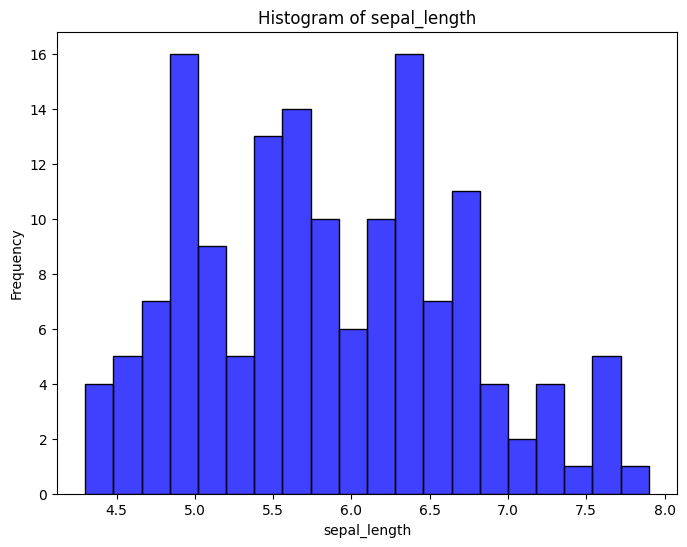

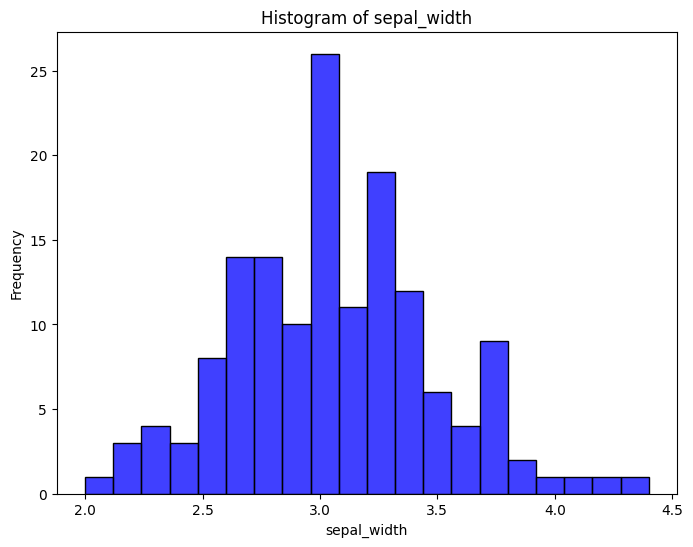

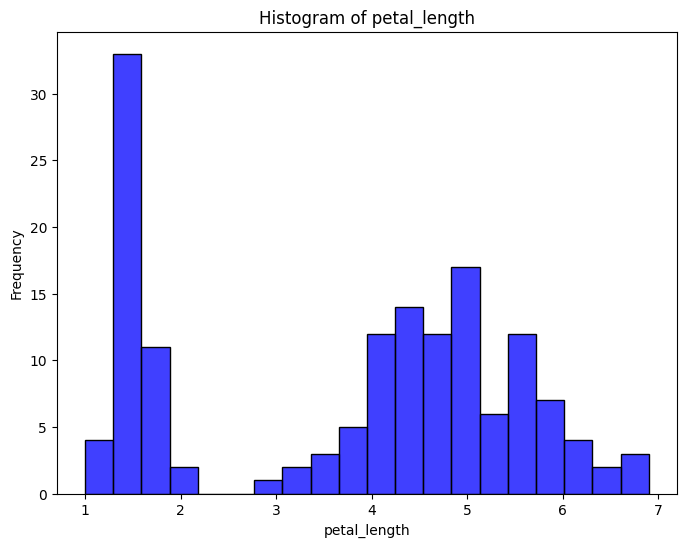

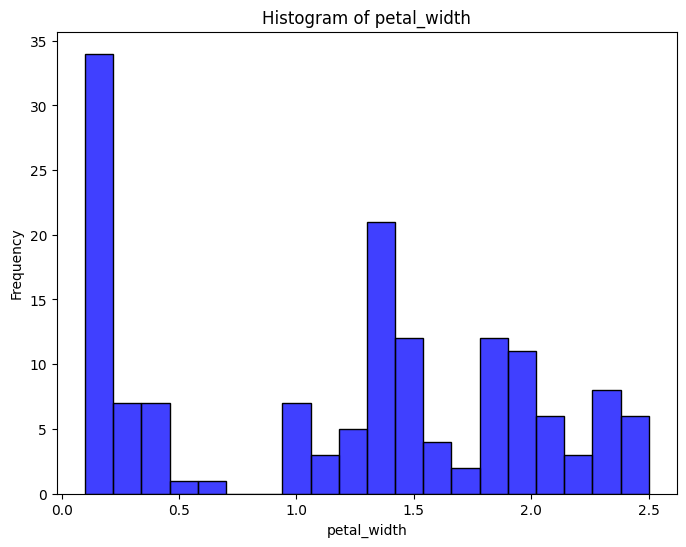

In [ ]:
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=20, color='blue')

    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

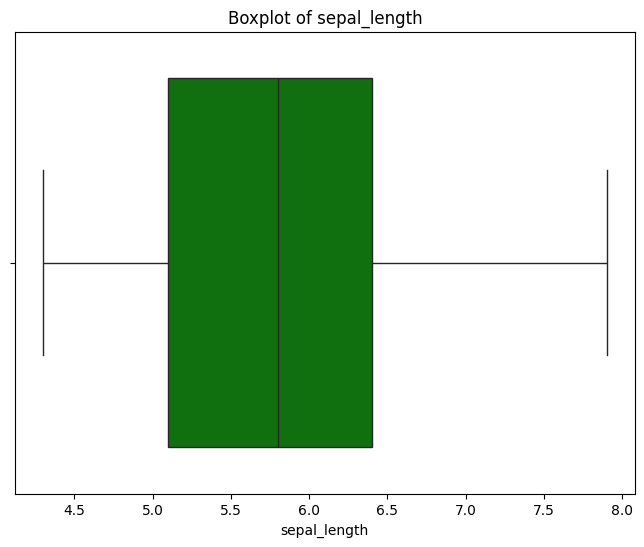

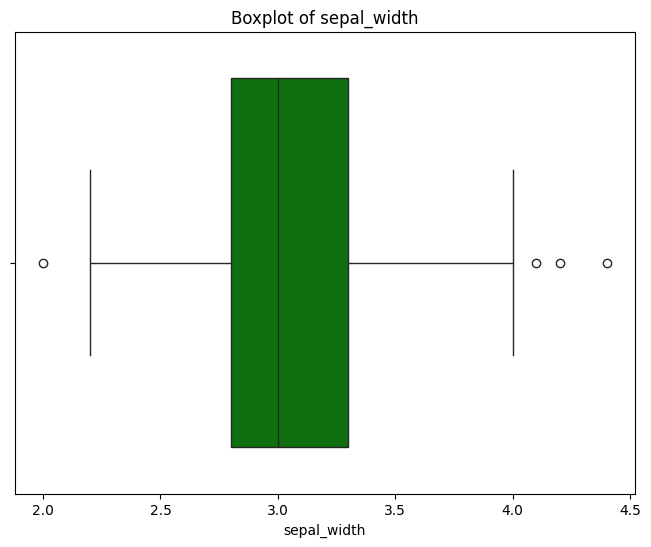

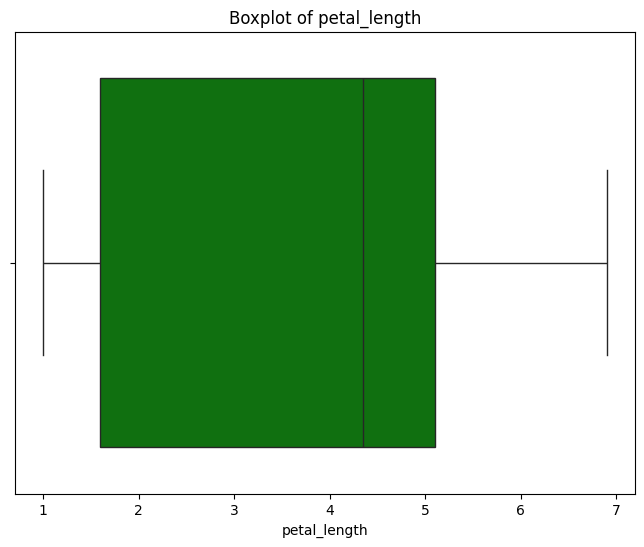

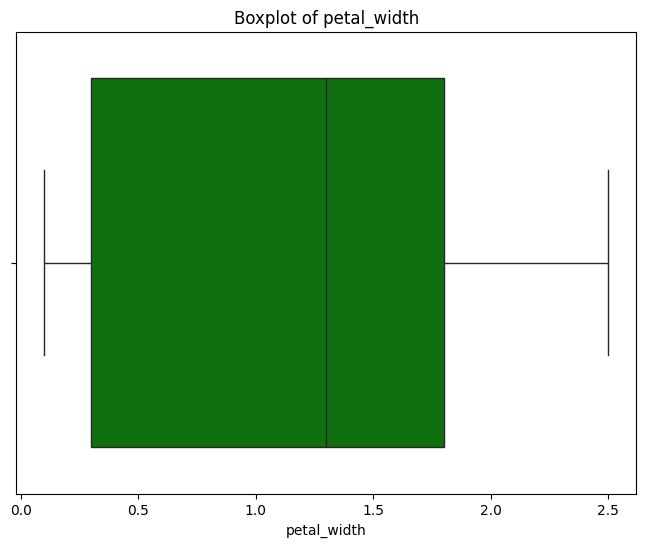

In [35]:
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='green')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()